In [682]:

import DW_oscillator as DW
import numpy as np
from IPython.display import clear_output

from torchdiffeq import odeint
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [683]:
torch.manual_seed(7)

"run_field_sequence" that randomly generates and simulates a set of fields. It returns the time, DW position and angle plus the input time sequence.
field_low and field_high specify the range the fields will be generated over while N_fields is the number of fields in the sequence and T is the time period of each field.

The outputs of interest are t, y and h_t. y[0] is the DW position over time (at time points given in t) and h_t is the magnetic field (serves as input) at the same times.

In [684]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [685]:
t, y, h_t, fields, periods = DW.run_field_sequence(field_low = 0., field_high = 500.0, N_fields = 10, T = 4,y0 = [0.0,0.0])

[146.23594415 345.53046308  28.89122286 125.80306123 289.19410929
 340.59013607 137.96577095 216.83622668 499.84861256 303.35083696]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [686]:
y0_values = [
    [0.0, 0.0],[60.,0.],[40.,0.],[30.,0.],[100.,0.],[-100.,0.]
    # Add more initial conditions here
]


In [687]:
t_tensors = []
y_tensors = []
h_t_tensors = []
fields_tensors = []
periods_tensors = []
for y0 in y0_values:
    t, y, h_t, fields, periods = DW.run_field_sequence(field_low = 0., field_high = 500.0, N_fields = 10, T = 4, y0=y0)
    
    # Convert lists to PyTorch tensors
    t_tensors.append(torch.tensor(t))
    y_tensors.append(torch.tensor(y))
    h_t_tensors.append(torch.tensor(h_t))
    fields_tensors.append(torch.tensor(fields))
    periods_tensors.append(torch.tensor(periods))
    
t_tensors = torch.stack(t_tensors, dim=0)
y_tensors = torch.stack(y_tensors, dim=0)
h_t_tensors = torch.stack(h_t_tensors, dim=0)
fields_tensors = torch.stack(fields_tensors, dim=0)
periods_tensors = torch.stack(periods_tensors, dim=0)
    
    

[174.33982342   9.13353634 431.18502388 461.43723551 291.72486498
  77.11803504 381.12267091 123.94700357 106.09541833 261.87779617]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[336.20177622 168.81574406 392.71639893  12.57335449 368.83646969
 384.58766438 388.29503467  99.5886623  379.86935835 353.64054795]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[ 19.61801996 202.54867847 181.32043173  98.22053383  77.73545476
  34.01242072 425.74670947 227.50241779 373.22833259 480.72568931]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[315.04675043 272.44056061 134.98117501 454.94893277 393.21543565
 407.96570888  71.27872239  96.91524133 184.09491632 391.38354036]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[ 25.66604835 251.21758738 422.72661732  17.54904352 132.47594143
 154.2412826  384.39962442 269.97344102 162.10776136 442.82213971]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[180.77415553 238.45745334 404.32486936 150.7973416  442.43122779
 480.24348623 431.35068965 422.43256478 330.76690767 443.66726565]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [688]:
t_tensors.shape,y_tensors.shape,h_t_tensors.shape,fields_tensors.shape,periods_tensors.shape

(torch.Size([6, 400]),
 torch.Size([6, 2, 400]),
 torch.Size([6, 400]),
 torch.Size([6, 10]),
 torch.Size([6, 10]))

In [689]:
fields_tensors,periods_tensors

(tensor([[174.3398,   9.1335, 431.1850, 461.4372, 291.7249,  77.1180, 381.1227,
          123.9470, 106.0954, 261.8778],
         [336.2018, 168.8157, 392.7164,  12.5734, 368.8365, 384.5877, 388.2950,
           99.5887, 379.8694, 353.6405],
         [ 19.6180, 202.5487, 181.3204,  98.2205,  77.7355,  34.0124, 425.7467,
          227.5024, 373.2283, 480.7257],
         [315.0468, 272.4406, 134.9812, 454.9489, 393.2154, 407.9657,  71.2787,
           96.9152, 184.0949, 391.3835],
         [ 25.6660, 251.2176, 422.7266,  17.5490, 132.4759, 154.2413, 384.3996,
          269.9734, 162.1078, 442.8221],
         [180.7742, 238.4575, 404.3249, 150.7973, 442.4312, 480.2435, 431.3507,
          422.4326, 330.7669, 443.6673]], dtype=torch.float64),
 tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4., 4., 4., 4., 4., 4

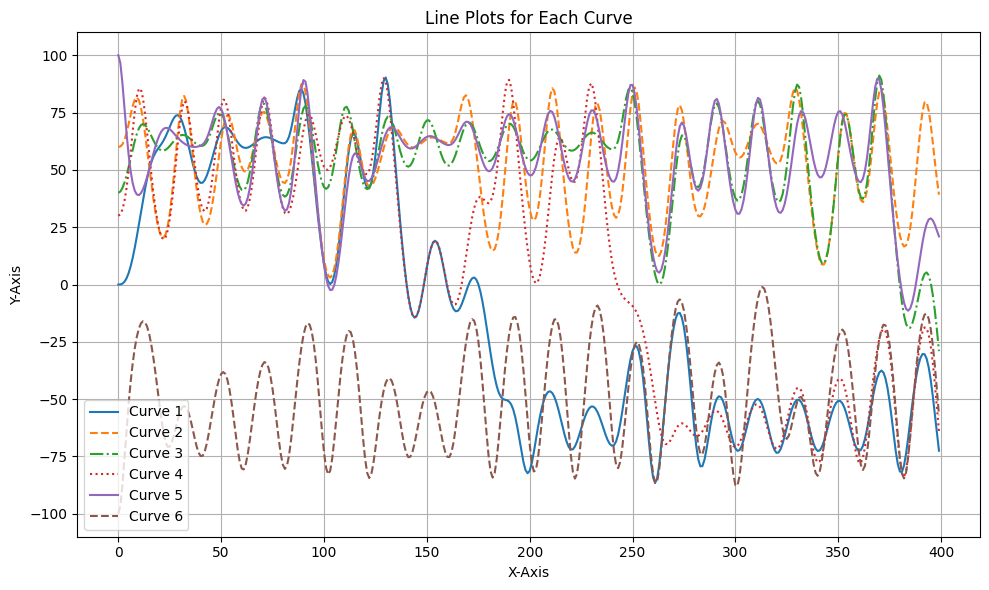

In [690]:
# Create a list of line styles
line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(y_tensors.shape[0]):
    line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
    label = f'Curve {i+1}'  # Add a label for the legend
    plt.plot(y_tensors[i, 0].numpy(), label=label, linestyle=line_style)

plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Line Plots for Each Curve')
plt.legend()  # Show legend to differentiate curves
plt.grid(True)  # Add grid lines for clarity
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

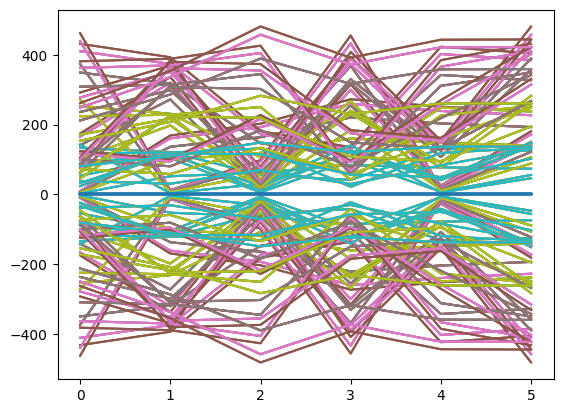

In [691]:
plt.plot(h_t_tensors)
plt.show()

In [692]:
def app (indices,seq_ind):
    h_t_ = h_t_tensors[seq_ind]
    omega = torch.tensor(2 * torch.pi * 0.5)  # f = 0.5
    if flag == True:
        h_accumulator = torch.zeros_like(torch.tensor([0.]), dtype=torch.float64)  # Initialize an empty tensor for h
        omega = omega * time_train[0]
        h = h_t_[0] * torch.sin(omega)
        h_accumulator = h
        return h_accumulator.unsqueeze(0)
    h_accumulator = torch.zeros_like(indices, dtype=torch.float64)  # Initialize an empty tensor for h
    
    for i in range(len(indices)):
        omega = omega * time_train[indices[i]]  # Assuming t is defined elsewhere
        h = h_t_[indices[i]] * torch.sin(omega)  # Assuming h_t is defined elsewhere
        h_accumulator[i] = h  # Store the calculated h in the accumulator tensor
    
    return h_accumulator.unsqueeze(0)  # Return the accumulator tensor
        

In [693]:
class DWODE(nn.Module):
    """
    neural network for learning the chaotic lorenz system
    """
    def __init__(self):
        super(DWODE, self).__init__()
        self.lin = nn.Linear(2, 32)
        self.lin2 = nn.Linear(32, 64)
        self.lin3 = nn.Linear(64,128)
        self.lin4 = nn.Linear(128,256)
        self.lin5 = nn.Linear(256,512)
        self.lin6 = nn.Linear(512,1024)
        self.lin7 = nn.Linear(1024,2)
        self.tanh = nn.Tanh()
        self.lrelu = nn.LeakyReLU()
        self.elu = nn.ELU()

    def forward(self,t,x):
        h = app(indices,seq_ind).view(-1,1).to(device)
        #print(x.shape,h.shape)
        x_aug = torch.cat([x, h], 1)
        x = self.elu(self.lin(x))
        x = self.lrelu(self.lin2(x))
        x = self.lrelu(self.lin3(x))
        x = self.lrelu(self.lin4(x))
        x = self.lrelu(self.lin5(x))
        x = self.tanh(self.lin6(x))
        x = self.lin7(x)
        return x
     

In [694]:
inits.shape

torch.Size([2])

In [695]:
time_train = torch.tensor(t).to(device)

In [696]:
time_train.shape

torch.Size([400])

In [697]:
y_tensors[:,0].shape

torch.Size([6, 400])

In [698]:
h_t_tensors.min()

tensor(-480.7257, dtype=torch.float64)

In [699]:
y_tensors.shape

torch.Size([6, 2, 400])

In [700]:
y_tensors[:,0].shape

torch.Size([6, 400])

In [701]:
data[0,:].shape

torch.Size([400, 2])

In [702]:
data[0,:].min()

tensor(-0.0469, device='cuda:0', dtype=torch.float64)

In [703]:
h_t_tensors = torch.div(h_t_tensors,1000.)
y_0 = y_tensors[:,0]

# Stack the tensors horizontally
data = torch.stack((torch.div(y_tensors[:,0],1000.), y_tensors[:,1]))

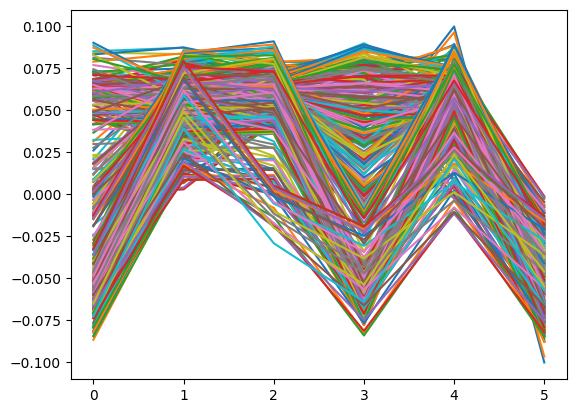

In [704]:
plt.plot(data[0])
plt.show()

In [705]:
data[0].shape

torch.Size([6, 400])

In [706]:
data[1].shape

torch.Size([6, 400])

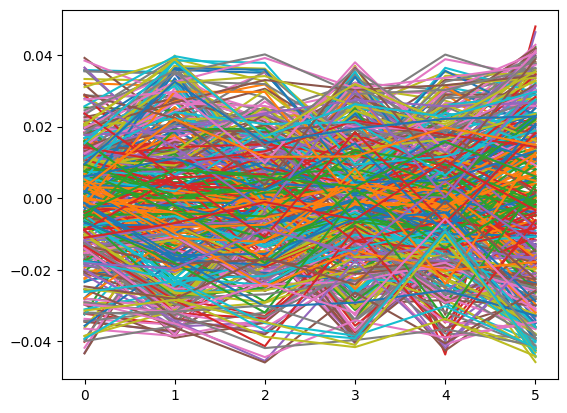

In [707]:
plt.plot(data[1])
plt.show()

In [708]:
data.shape

torch.Size([2, 6, 400])

In [709]:
model = DWODE().double().to(device)

In [710]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2)

In [711]:
data = data.permute(1,2,0).to(device)

In [712]:
data.shape

torch.Size([6, 400, 2])

In [713]:
h_t_tensors.shape

torch.Size([6, 400])

In [714]:
def get_batch(true_y, batch_size):
    # Choose one of the 5 sequences randomly
    sequence_index = np.random.randint(len(true_y))
    selected_sequence = true_y[sequence_index]
    # print(sequence_index)
    num_samples = len(selected_sequence)

    # Randomly select a starting point for the batch
    indices = np.random.choice(np.arange(num_samples - batch_size, dtype=np.int64), size=batch_size, replace=False)
    indices.sort()
    # Extract init, interval, and truth based on the selected sequence and batch size
    init = selected_sequence[indices]  # (batch_size, T, M, D)
    interval = time_train[:batch_size]  # (batch_size)

    # You can choose to reshape truth if needed
    truth = torch.stack([selected_sequence[indices + i] for i in range(batch_size)], dim=0)  # Example: truth = init.reshape(batch_size, T, M, D)
    indices = torch.tensor(indices)
    return init, interval, truth,indices,sequence_index


In [715]:
from torchdiffeq import odeint_adjoint as adjoint

In [716]:
flag = False

In [717]:
data[0].shape

torch.Size([400, 2])

Iter 0900 | Total Loss 0.004917


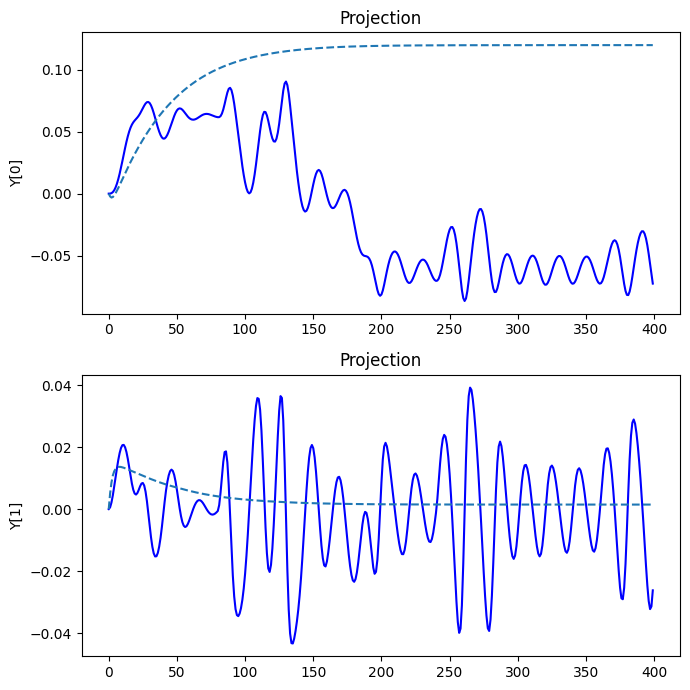

In [718]:
losses = []
whole_losses = []
best_loss = 100.0
for i in range(1000):
   
    optimizer.zero_grad()
    
    init,batch_t,truth,indices,seq_ind = get_batch(data,8)
    #print(init,batch_t,truth)
    pred_y = adjoint(model,init,batch_t,method='dopri5')
    loss = F.huber_loss(pred_y, truth)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    if loss.item() < best_loss:
                best_loss = loss.item()
                torch.save(model.state_dict(), 'saved_models/domain_best_crazy.pth')
    if i % 100 == 0:
        
        with torch.no_grad():
            flag = True
            inits = data[0,0,:].to(device)
            pred_y = adjoint(model, inits.view(1,-1), time_train,method='dopri5')
            pred_y = pred_y.squeeze(1)
            loss = F.huber_loss(pred_y, data[0])
            whole_losses.append(loss.item())
            flag = False
            print('Iter {:04d} | Total Loss {:.6f}'.format(i, loss.item()))
            x_pred = pred_y[:,0].cpu()
            y_pred = pred_y[:,1].cpu()
           

            # Extract the x, y, z coordinates from X_train_plt
            x_train = data[0,:,0].cpu()
            y_train = data[0,:,1].cpu()
            

            fig, ax = plt.subplots(2, 1, figsize=(7, 7))
            ax[0].plot(x_train, label='True',color = 'blue')
            ax[0].plot(x_pred, label='Predicted', linestyle='--')
            ax[0].set_ylabel('Y[0]')
            ax[0].set_title('Projection')
          

            ax[1].plot(y_train, label='True',color = 'blue')
            ax[1].plot(y_pred, label='Predicted',linestyle='--')
            ax[1].set_ylabel('Y[1]')
            ax[1].set_title('Projection')
         

            
          

            plt.tight_layout()
            plt.show()
            clear_output(wait=True)

In [719]:
x_train.shape

torch.Size([400])

In [720]:
test_model = DWODE().double().to(device)

In [721]:
test_model.load_state_dict(torch.load('saved_models/domain_best_crazy.pth'))

<All keys matched successfully>

In [722]:
inits = data[0,0,:].to(device)

In [723]:
inits.shape

torch.Size([2])

In [724]:
flag = True

In [725]:
with torch.no_grad():
    pred = odeint(test_model, inits.view(1,-1), time_train)
  

In [726]:
flag = False

In [727]:
pred = pred.cpu().detach().numpy()

In [728]:
pred = pred.squeeze(1)

In [729]:
data_ = data[0]

In [730]:
pred.shape,data_.shape

((400, 2), torch.Size([400, 2]))

In [731]:
x_pred.shape

torch.Size([400])

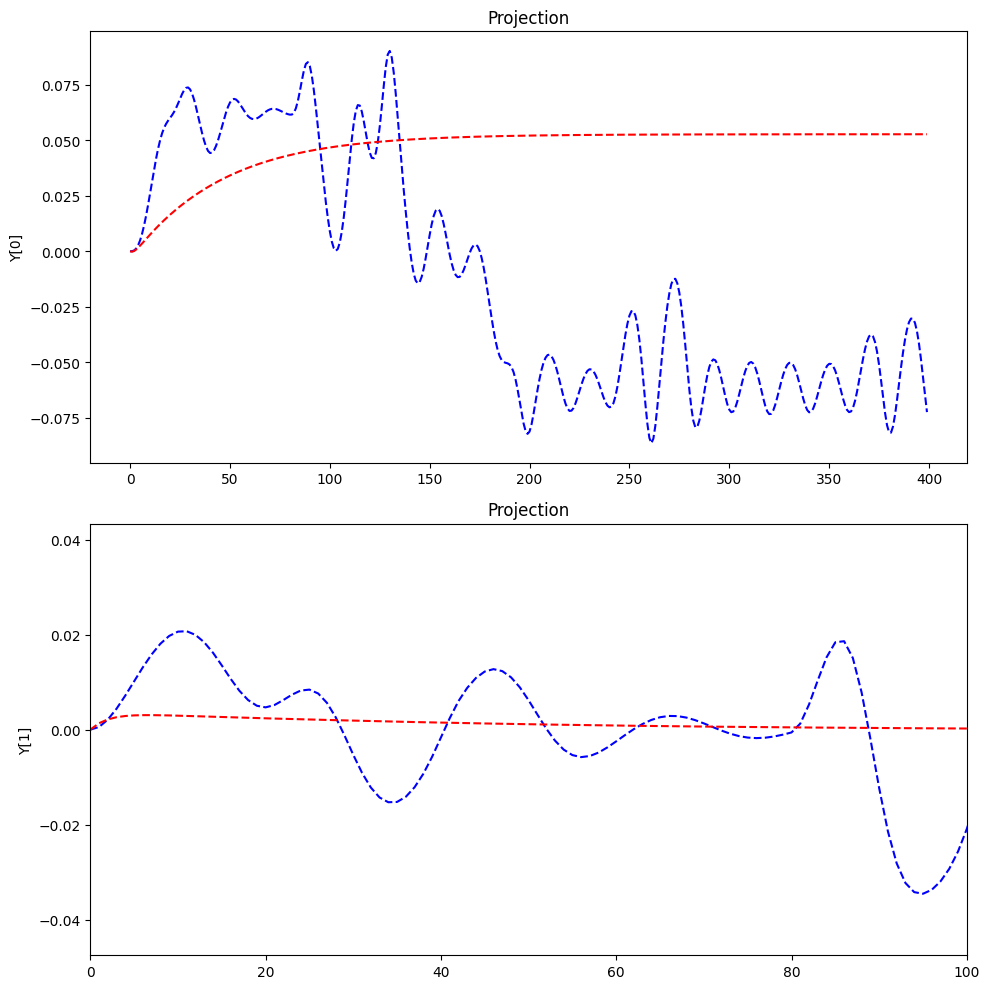

In [732]:
# Extract the x, y, z coordinates from predictions_plt
x_pred = pred[:,0]
y_pred = pred[:,1]

# Extract the x, y, z coordinates from X_train_plt
x_train = data_[:,0].cpu()
y_train = data_[:,1].cpu()


fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(x_train, label='True',color = 'blue', linestyle='--')
ax[0].plot(x_pred, label='Predicted', linestyle='--',color = 'red')
ax[0].set_ylabel('Y[0]')
ax[0].set_title('Projection')


ax[1].plot(y_train, label='True',color = 'blue', linestyle='--')
ax[1].plot(y_pred, label='Predicted',linestyle='--',color = 'red')
ax[1].set_xlim(0,100)
ax[1].set_ylabel('Y[1]')
ax[1].set_title('Projection')





plt.tight_layout()
plt.show()
clear_output(wait=True)